Getting malicious IPs...
Done getting malicious IPs
有tag的ip: 281 (72.24%)
botnets: 56 (14.4%)
malware: 14 (3.6%)
phishing: 45 (11.57%)
ip_scanning: 35 (9.0%)
port_scanning: 8 (2.06%)
spam: 47 (12.08%)
cloud: 44 (11.31%)
tor: 111 (28.53%)
search_engine: 15 (3.86%)
crypto_mining: 0 (0.0%)
exploits: 219 (56.3%)
['crypto_mining', 'port_scanning', 'malware', 'search_engine', 'ip_scanning', 'cloud', 'phishing', 'spam', 'botnets', 'tor', 'exploits']
[0, 8, 14, 15, 35, 44, 45, 47, 56, 111, 219]


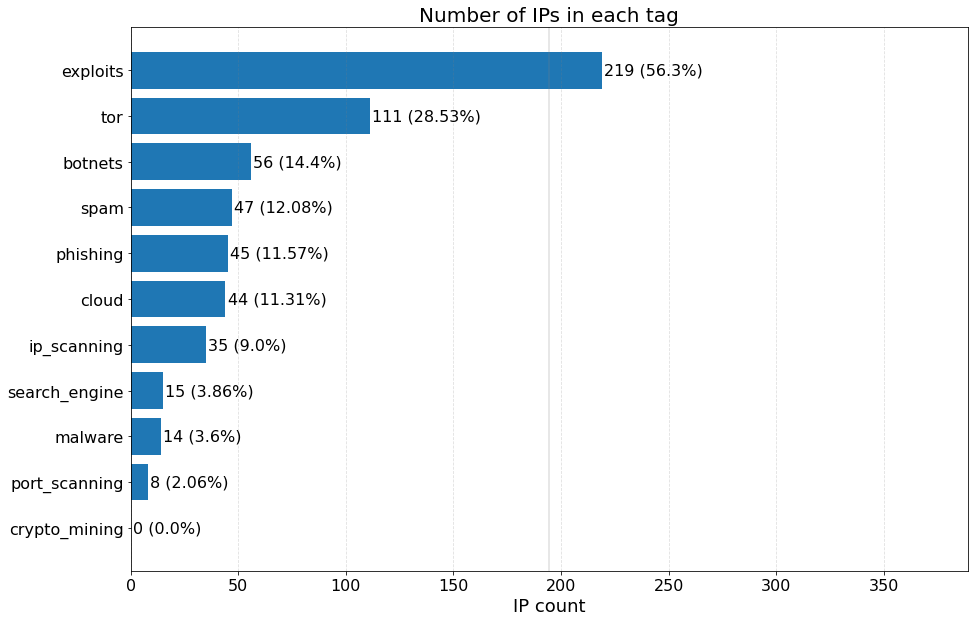

In [11]:
# %load show_tag_count.py
# %load show_tag_count.py
from utils.DefaultValue import *
from collections import defaultdict
import os
from rules import get_cloud_list
import matplotlib.pyplot as plt
import count_tag, return_malicious_IP_set

def main(tag_count, malicious_ip_len, out_folder):
#     # NOTE FOR TEST
# def main():
#     start_date = "20230101"
#     end_date = "20230609"
#     out_folder = f'{BASE_PATH}picutre_output' 
#     malicious_ip = return_malicious_IP_set.main(start_date, end_date)  # the return value is a set of malicious IP
#     tag_count = count_tag.main(malicious_ip)
#     malicious_ip_len = len(malicious_ip)
#     # NOTE FOR TEST END

    # sort tag_count
    sorted_tag_count = list()
    for key in tag_count:
        count = tag_count[key]
        sorted_tag_count.append((f'{key}', count))
    sorted_tag_count.sort(key = lambda x: x[1])

    # extract key and count
    tag_list = list()
    count_list = list()
    for pair in sorted_tag_count:
        tag_list.append(pair[0])
        count_list.append(pair[1])
    # get percentage
    percentage_list = list()
    for count in count_list:
        percentage_list.append(round((count/malicious_ip_len)*100, 2))
        
    fig, ax = plt.subplots(figsize=(15, 10))
    bars = ax.barh(tag_list, count_list)
    # set the max value of ip
    ax.set_xlim(right=malicious_ip_len)
    
    label_fontsize = 16
    # set title
    ax.set_title("Number of IPs in each tag", fontsize=label_fontsize+4)
    ax.set_xlabel('IP count', fontsize=label_fontsize+2)
    print(tag_list)
    print(count_list)
    # Display the values on top of the bars
    for x,y in enumerate(count_list):
        ax.text(y+1, x, f'{y} ({percentage_list[x]}%)', va='center', fontsize=label_fontsize) # va stand for verticalaligned
    
    # grid
    ax.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
    ax.axvline(malicious_ip_len/2, color='grey', alpha=0.25)  # median position
    
    # label size
    ax.tick_params(axis='y', labelsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=label_fontsize)
    
    # save figure
    plt.savefig(f'{out_folder}/tag_count.png')
    plt.show()


if __name__ == '__main__':
    main()
